In [4]:
import os
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import PIL
import torchvision
import torchvision.transforms as T


In [5]:
print(torch.__version__)
print(torchvision.__version__)

1.9.0+cu102
0.10.0+cu102


### reference: [Load and process images using PyTorch](https://pytorch.org/tutorials/beginner/data_loading_tutorial.html)

In [6]:
data_dir = "/mnt/Storage/home/yuzhaowei/.keras/datasets/flower_photos"
rose_images = [i for i in os.listdir(os.path.join((data_dir), "roses"))]
print(rose_images[0:10])

['6363976189_e7155e5f9c.jpg', '15821959372_518b9dcf57_n.jpg', '3903276582_fe05bf84c7_n.jpg', '14970973709_968910640e_n.jpg', '6125332325_b768e08bd9_n.jpg', '9353111163_7a89b2df35_n.jpg', '17051448596_69348f7fce_m.jpg', '13264214185_d6aa79b3bd.jpg', '4684127262_6c3346188d.jpg', '3208417632_19138d8e35_n.jpg']


## 1. Read images to numpy array using scikit-image 

<class 'PIL.JpegImagePlugin.JpegImageFile'>
(313, 500, 3)
<class 'PIL.JpegImagePlugin.JpegImageFile'>
(240, 320, 3)
<class 'PIL.JpegImagePlugin.JpegImageFile'>
(240, 320, 3)
<class 'PIL.JpegImagePlugin.JpegImageFile'>
(245, 320, 3)
<class 'PIL.JpegImagePlugin.JpegImageFile'>
(240, 320, 3)
<class 'PIL.JpegImagePlugin.JpegImageFile'>
(241, 320, 3)
<class 'PIL.JpegImagePlugin.JpegImageFile'>
(240, 180, 3)
<class 'PIL.JpegImagePlugin.JpegImageFile'>
(333, 500, 3)
<class 'PIL.JpegImagePlugin.JpegImageFile'>
(246, 500, 3)


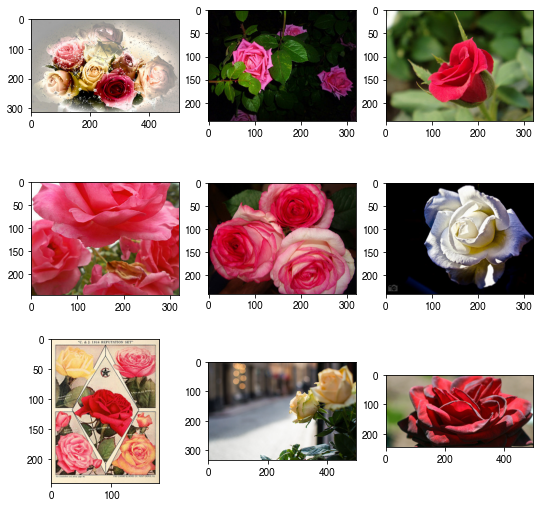

In [7]:
fig, axs = plt.subplots(figsize = (9,9), nrows = 3, ncols = 3)
for i in range(9):
    image = PIL.Image.open(os.path.join(data_dir, "roses", rose_images[i]))
    print(type(image)) 
    print(np.array(image).shape) # height, width, channel
    axs[i//3, i%3].imshow(image)

## 2. Read images to PyTorch tensor

torch.Size([3, 313, 500])
<PIL.Image.Image image mode=RGB size=500x313 at 0x7F53592F6FA0>
torch.Size([3, 240, 320])
<PIL.Image.Image image mode=RGB size=320x240 at 0x7F53592F6F40>
torch.Size([3, 240, 320])
<PIL.Image.Image image mode=RGB size=320x240 at 0x7F5359284610>
torch.Size([3, 245, 320])
<PIL.Image.Image image mode=RGB size=320x245 at 0x7F5359284940>
torch.Size([3, 240, 320])
<PIL.Image.Image image mode=RGB size=320x240 at 0x7F5359284C70>
torch.Size([3, 241, 320])
<PIL.Image.Image image mode=RGB size=320x241 at 0x7F5359284F70>
torch.Size([3, 240, 180])
<PIL.Image.Image image mode=RGB size=180x240 at 0x7F5359291310>
torch.Size([3, 333, 500])
<PIL.Image.Image image mode=RGB size=500x333 at 0x7F5359291640>
torch.Size([3, 246, 500])
<PIL.Image.Image image mode=RGB size=500x246 at 0x7F5359291970>


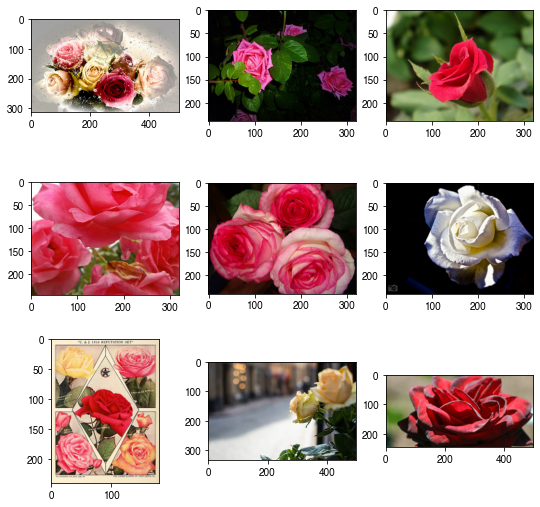

In [8]:
fig, axs = plt.subplots(figsize = (9,9), nrows = 3, ncols = 3)
for i in range(9):
    # read image to PyTorch tensor
    image_tensor = torchvision.io.read_image(os.path.join(data_dir, "roses", rose_images[i]))
    print(image_tensor.shape) # channel, height, width (PyTorch tensor)
    image_PIL = torchvision.transforms.ToPILImage()(image_tensor)
    print(image_PIL) 
    axs[i//3, i%3].imshow(image_PIL)

## 3. Resize images

<class 'PIL.JpegImagePlugin.JpegImageFile'>
(313, 500, 3)
<class 'PIL.JpegImagePlugin.JpegImageFile'>
(240, 320, 3)
<class 'PIL.JpegImagePlugin.JpegImageFile'>
(240, 320, 3)
<class 'PIL.JpegImagePlugin.JpegImageFile'>
(245, 320, 3)
<class 'PIL.JpegImagePlugin.JpegImageFile'>
(240, 320, 3)
<class 'PIL.JpegImagePlugin.JpegImageFile'>
(241, 320, 3)
<class 'PIL.JpegImagePlugin.JpegImageFile'>
(240, 180, 3)
<class 'PIL.JpegImagePlugin.JpegImageFile'>
(333, 500, 3)
<class 'PIL.JpegImagePlugin.JpegImageFile'>
(246, 500, 3)


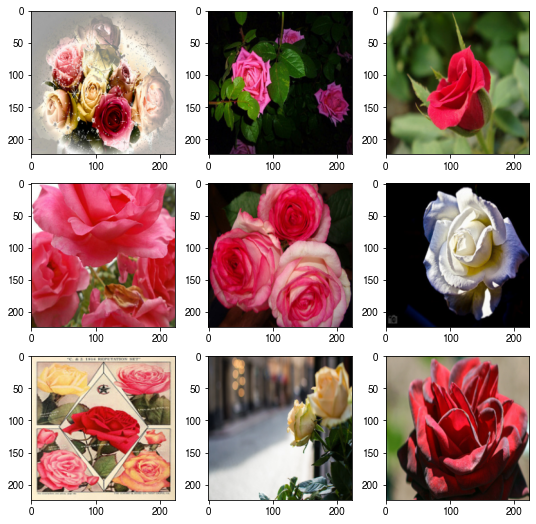

In [9]:
fig, axs = plt.subplots(figsize = (9,9), nrows = 3, ncols = 3)
for i in range(9):
    image = PIL.Image.open(os.path.join(data_dir, "roses", rose_images[i]))
    print(type(image)) 
    print(np.array(image).shape) # height, width, channel
    image_resize = T.Resize(size = (224, 224))(image)
    axs[i//3, i%3].imshow(image_resize)

## 4. Read image using PIL and converted to tensor (but it is not enough to run in PyTorch, more treatment can be found in the next notebook)

In [12]:
for i in range(9):
    image = PIL.Image.open(os.path.join(data_dir, "roses", rose_images[i]))
    # print(type(image)) 
    # print(np.array(image).shape) # height, width, channel
    image_tensor = torch.from_numpy(np.array(image).transpose((2, 0, 1))) # H x W x C to C x H x W